In [44]:
from math import*
from random import*
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [45]:
#Facteur d'actualisation# 
#t en années#
def taux_spot(r_0,t,a,b,s):
    esp=r_0*exp(-a*t)+b*(1-exp(-a*t))
    std=s*sqrt((1-exp(-2*a*t))/(2*a))
    return npr.normal(esp,std)
    
        
        

In [46]:
taux_spot(0.005,1,0.01,0.02,0.04)

-0.05405646102790437

In [49]:
def courbe_taux_spot(r_0,t,a,b,s):
    X=[k/12 for k in range(0,25)]+[k for k in range(3,t+1)]
    t_s=[taux_spot(r_0,x,a,b,s) for x in X]
    plt.plot(X,t_s,'o')
    plt.xlabel('Maturité en année')
    plt.ylabel('Taux spot')
    plt.title('Courbe des taux spots sur une durée de '+str(t)+' ans')
    plt.show()
    

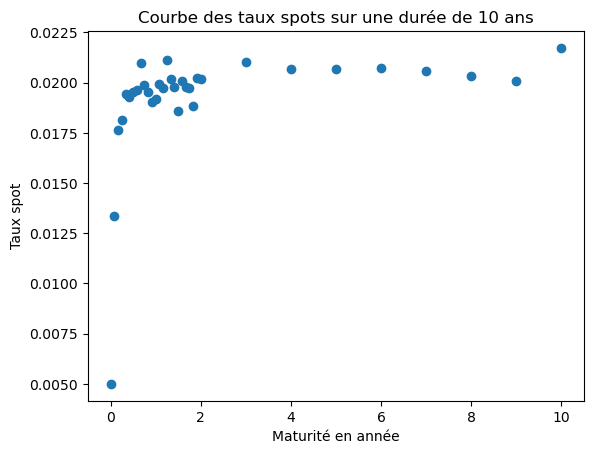

In [50]:
courbe_taux_spot(0.005,10,10,0.02,0.004)

In [84]:
def A(t,T,s,a):
    while t>T:
        t=int(input('Saisissez valeur de t inférieure à T: '))
    p=s**2/(a**2)*(T-t)
    q=-2*(s**2)*(1-exp(-a*(T-t)))/(a**3)
    r=(s**2)*(1-exp(-2*a*(T-t)))/(a**3)
    return p+q+r

In [85]:
A(0,10,0.3,0.1)

54.03812391956447

In [86]:
#Prix de l'obligation en t de maturité T
def prix_oblig(r_0,t,T,a,b,s):
    while t>T:
        t=int(input('Saisissez valeur de t inférieure à T:  '))
    return exp(A(t,T,s,a)/2)*exp(-b*(T-t)+(b- taux_spot(r_0,t,a,b,s))*(1-exp(-a*(T-t)))/a)

In [87]:
prix_oblig(0.005,0,8,0.3,0.1,0.2)

1.9218287577971713

In [88]:
#Rendement de l'obligation ZC#

def rendement_ZC(r_0,t,T,a,b,s):
    while t>T:
        t=int(input('Saisissez valeur de t inférieure à T: '))
    return -log(prix_oblig(r_0,t,T,a,b,s))/(T-t)

In [89]:
rendement_ZC(0.005,0,8,0.03,0.001,0.002)

0.0027555325903077486

In [90]:
def courbe_taux_ZC(r_0,t,T,a,b,s):
    while t>T:
        t=int(input('Saisissez valeur de t inférieure à T: '))
    X=[k for k in range(1,T+1) if k>t]
    r_ZC=[rendement_ZC(r_0,t,x,a,b,s) for x in X]
    plt.plot(X,r_ZC)
    plt.show()
    

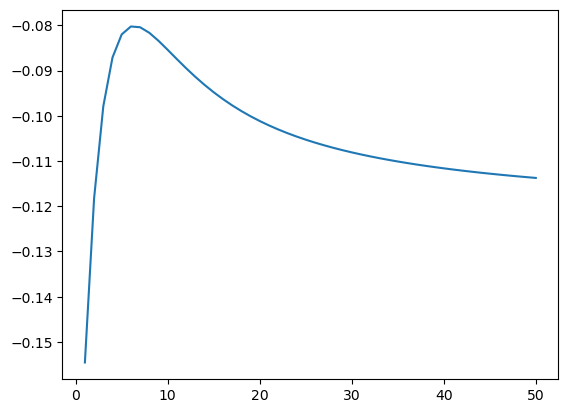

In [91]:
courbe_taux_ZC(0.005,0,50,0.3,0.1,0.2)